<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Anna Tarelina (@feuerengel), and Mikhail Korshchikov (@MS4). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2019
## <center> Part 1. Decision trees for classification and regression

**In this assignment, we will find out how a decision tree works in a regression task, then will build and tune classification decision trees for identifying heart diseases.**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1-xvxl0xjV4voDYIbcCxxpAc_pjcWEpnLQ9kaKLHwXsA). Solutions will be shared only with those who've filled in this form 
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [66]:
from __future__ import division, print_function
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Decision trees for regression: a toy example

Let's consider the following one-dimensional regression problem. We need to build a function $\large a(x)$ to approximate the dependency $\large y = f(x)$ using the mean-squared error criterion: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

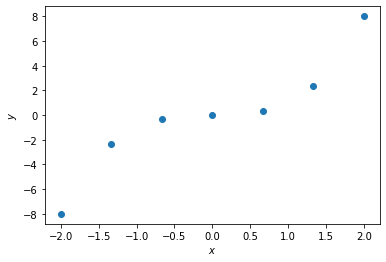

In [67]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Let's make several steps to build a decision tree. In the case of a **regression** task, at prediction time, the leaf returns the average value for all observations in this leaf.

Let's start with a tree of depth 0, i.e. all observations placed in a single leaf. 

<br>You'll need to build a tree with only one node (also called **root**) that contains all train observations (instances). 
<br>How will predictions of this tree look like for $x \in [-2, 2]$? <br> Create an appropriate plot using a pen, paper and Python if needed (but no `sklearn` is needed yet).

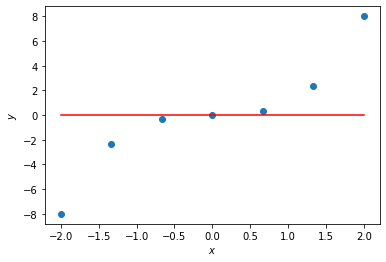

In [68]:
# Solution code
xx = np.linspace(-2, 2, 1000)
predictions = [np.mean(y) for x in xx]

plt.scatter(X, y);
plt.plot(xx, predictions, c='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

**Making first splits.**
<br>Let's split the data according to the following condition $[x < 0]$. It gives us the tree of depth 1 with two leaves. To clarify, for all instances with $x \geqslant 0$ the tree will return some value, for all instances with $x < 0$ it will return another value. Let's create a similar plot for predictions of this tree.

Full entropy: 0.9852281360342515
[array([ True,  True,  True, False, False, False, False])]
[array([False, False, False,  True,  True,  True,  True])]
[-8.         -2.37037037 -0.2962963 ]
[0.         0.2962963  2.37037037 8.        ]


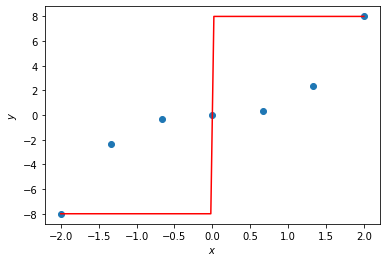

In [69]:
# Solution code
Px_1 = 3/7 # x < 0
Px_2 = 4/7 # x >= 0
S_0 = -Px_1 * np.log2(Px_1) - Px_2 * np.log2(Px_2)
print("Full entropy: " + str(S_0))

xx = np.linspace(-2, 2, 100)
print([y < 0])
print([y >= 0])

print(y[X < 0])
print(y[X >= 0])
# y values for separator line on chart
predictions = [np.min(y[X < 0]) if x < 0 else np.max(y[X >= 0]) for x in xx]

plt.scatter(X, y)
plt.plot(xx, predictions, c='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In the decision tree algorithm, the feature and the threshold for splitting are chosen according to some criterion. The commonly used criterion for regression is based on variance: $$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$
where $\large X$ and $\large y$ are a feature matrix and a target vector (correspondingly) for training instances in a current node, $\large X_l, y_l$ and $\large X_r, y_r$ are splits of samples $\large X, y$ into two parts with respect to $\large [x_j < t]$ (by $\large j$-th feature and threshold $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (or, the same, $\large |y|$, $\large |y_l|$, $\large |y_r|$) are sizes of appropriate samples, and $\large D(X, y)$ is variance of answers $\large y$ for all instances in $\large X$:
$$\large D(X, y) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$
Here $\large y_i = y(x_i)$ is the answer for the $\large x_i$ instance. Feature index $\large j$ and threshold $\large t$ are chosen to maximize the value of criterion  $\large Q(X, y, j, t)$ for each split.

In our 1D case,  there's only one feature so $\large Q$ depends only on threshold $\large t$ and training data $\large X$ and $\large y$. Let's designate it $\large Q_{1d}(X, y, t)$ meaning that the criterion no longer depends on feature index $\large j$, i.e. in 1D case $\large j = 1$.

In [70]:
# Solution code
# X and y are vectors.
# Variance actually uses only \X\ (X vector length) which is equal to \y\,
# so actually we need to consider y as only dependency
def regression_var_criterion(X, y, t):
    X_l, X_r = X[X < t], X[X >= t]
    y_l, y_r = y[X < t], y[X >= t]
    return np.var(y) - \
           ((X_l.shape[0] / X.shape[0]) * np.var(y_l)) - \
           ((X_r.shape[0] / X.shape[0]) * np.var(y_r))

Create the plot of criterion $\large Q_{1d}(X, y, t)$  as a function of threshold value $t$ on the interval $\large [-1.9, 1.9]$.

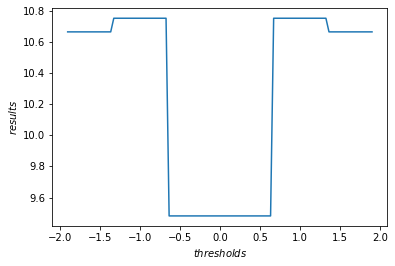

In [71]:
thresholds = np.linspace(-1.9, 1.9, 100)
results = [regression_var_criterion(X, y, t) for t in thresholds]

plt.plot(thresholds, results)
plt.xlabel(r'$thresholds$')
plt.ylabel(r'$results$');

**<font color='red'>Question 1.</font> What is the worst threshold value (to perform a split) according to the variance criterion?**

<font color = 'red'> **Answer options:** </font>
- -1.9
- -1.3
- 0 [+]
- 1.3
- 1.9 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Then let's make splitting in each of the leaves nodes. 
<br> Take your tree with first threshold [$x<0$].
<br> Now add a split in the left branch (where previous split was $x < 0$) using the criterion $[x < -1.5]$, in the right branch (where previous split was $x \geqslant 0$) with the following criterion $[x < 1.5]$. 
<br>It gives us a tree of depth 2 with 7 nodes and 4 leaves. Create a plot of this tree predictions for $x \in [-2, 2]$.

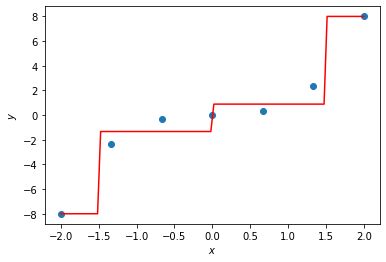

In [72]:
def more_complex_predicate(X, y, x):
    if x < -1.5:
        return np.mean(y[X < -1.5])
    elif x >= -1.5 and x < 0:
        return np.mean(y[(X >= -1.5) & (X < 0)])
    elif x > 0 and x < 1.5:
        return np.mean(y[(X >= 0) & (X < 1.5)])
    else:
        return np.mean(y[X >= 1.5])

xx = np.linspace(-2, 2, 100)
# y values for separator line on chart
predictions = [more_complex_predicate(X, y, x) for x in xx]

plt.scatter(X, y)
plt.plot(xx, predictions, c='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

**<font color='red'>Question 2.</font> Tree predictions is a piecewise-constant function, right? How many "pieces" (horizontal segments in the plot that you've just built) are there in the interval [-2, 2]?**

<font color = 'red'> **Answer options:** </font>
- 2
- 4 [+]
- 6
- 8

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

## 2. Building a decision tree for predicting heart diseases
Let's read the data on heart diseases. The dataset can be downloaded from the course repo from [here](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) by clicking on `Download` and then selecting `Save As` option. If you work with Git, then the dataset is already there in `data/mlbootcamp5_train.csv`.

**Problem**

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [73]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [74]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: 
- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$) 
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [75]:
df['age_years'] = (df.age / 365.25).astype('int')
complete_prepared_data = pd.get_dummies(df, columns=['cholesterol', 'gluc'])
X = complete_prepared_data.drop(['cardio'], axis=1)
y = df.cardio
X.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


Split data into train and holdout parts in the proportion of 7/3 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [76]:
# Solution
X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, y, test_size=0.3,
                                                          random_state=17)

tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train);

Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz. Here we need to mention that `sklearn` doesn't draw decision trees on its own, but is able to output a tree in the `.dot` format that can be used by Graphviz for visualization. 

How to plot a decision tree, alternatives:
 1. Install Graphviz and pydotplus yourself (see below)
 2. Use our docker image with all needed packages already installed
 3. Easy way: execute `print(dot_data.getvalue())` with `dot_data` defined below (this can be done without pydotplus and Graphviz), go to http://www.webgraphviz.com, paste the graph code string (digraph Tree {...) and generate a nice picture

There are may be some troubles with graphviz for Windows users.
The error is 'GraphViz's executables not found'.
<br>To fix that - install Graphviz from [here](https://graphviz.gitlab.io/_pages/Download/Download_windows.html).
<br>Then add graphviz path to your system PATH variable. You can do this manually, but don't forget to restart kernel.
<br>Or just run this code:

In [77]:
from io import StringIO
import pydotplus
from ipywidgets import Image

dot_data = StringIO()
export_graphviz(tree, feature_names=X.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x1c\x00\x00\x01\xf1\x08\x02\x00\x00\x00\x19w\x81…

Take a look how trees are visualized in the [3rd part](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true) of course materials.

**<font color='red'>Question 3.</font> Which 3 features are used to make predictions in the created decision tree?**

<font color = 'red'> **Answer options:** </font>
- age, ap_lo, chol=1
- age, ap_hi, chol=3 [+]
- smoke, age, gender
- alco, weight, gluc=3

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Make predictions for holdout data `(X_valid, y_valid)` with the trained decision tree. Calculate accuracy.

In [78]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
acc1 = accuracy_score(y_holdout, tree_pred)
print(acc1)

0.7212857142857143


Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

In [79]:
depths = list(range(2, 11))
tree_params = {'max_depth': depths}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=1,
                         verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

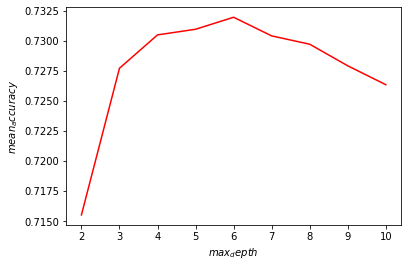

In [80]:
plt.plot(list(range(2, 11)), tree_grid.cv_results_["mean_test_score"], c='red')
plt.xlabel(r'$max_depth$')
plt.ylabel(r'$mean_accuracy$');

Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

In [81]:
# Local maximum of max_depth param
max_depth_result = tree_grid.best_params_["max_depth"]
print("max_depth_result: " + str(max_depth_result))
# Accuracy of the tree grid on holdout data
acc2 = accuracy_score(y_holdout, tree_grid.predict(X_holdout))
print("acc2: " + str(acc2))

max_depth_result: 6
acc2: 0.7258095238095238


Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [82]:
print(abs(acc2 - acc1) / acc1 * 100)

0.6271869016967002


**<font color='red'>Question 4.</font> Choose all correct statements.**

<font color = 'red'> **Answer options:** </font>

- There exists a local maximum of accuracy on the built validation curve [+]
- `GridSearchCV` increased holdout accuracy by **more** than 1%
- There is **no** local maximum of accuracy on the built validation curve
- `GridSearchCV` increased holdout accuracy by **less** than 1% [+]

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Take a look at the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. [Source paper](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='../../img/SCORE2007-eng.png' width=70%>

Let's create new features according to this picture:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero. 

<br>Add a ``smoke`` feature.
<br>Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

**<font color='red'>Question 5.</font> Which binary feature is the most important for heart disease detection (i.e., it is placed in the root of the tree)?**

<font color = 'red'> **Answer options:** </font>

- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- Systolic blood pressure from 140 to 160 (mmHg)
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

In [196]:
complete_prepared_data_2 = complete_prepared_data.copy()
complete_prepared_data_2['gender'] = complete_prepared_data_2['gender'].map({2: 1, 1: 0})
complete_prepared_data_2.rename(columns={"gender": "male"}, inplace=True)
complete_prepared_data_2.drop(["age"], axis=1, inplace=True)
complete_prepared_data_2.head()

,male,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,1,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,0,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,0,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,1,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,0,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [197]:
def convert_age(age):
    if age in range(40,50):
        return "40-50"
    elif age in range(50,55):
        return "50-55"
    elif age in range(55,60):
        return "55-60"
    elif age in range(60,65):
        return "60-65"
    else:
        return None
    
def convert_systolic_blood_pressure(ap_hi):
    if ap_hi in range(120,140):
        return "120-140"
    elif ap_hi in range(140,160):
        return "140-160"
    elif ap_hi in range(160,180):
        return "160-180"
    else:
        return None

complete_prepared_data_2["age_years"] = complete_prepared_data_2["age_years"].apply(convert_age)
complete_prepared_data_2["ap_hi"] = complete_prepared_data_2["ap_hi"].apply(convert_systolic_blood_pressure)
complete_prepared_data_2.head()

,male,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,1,168,62.0,None,80,0,0,1,0,50-55,1,0,0,1,0,0
1,0,156,85.0,140-160,90,0,0,1,1,55-60,0,0,1,1,0,0
2,0,165,64.0,120-140,70,0,0,0,1,50-55,0,0,1,1,0,0
3,1,169,82.0,140-160,100,0,0,1,1,40-50,1,0,0,1,0,0
4,0,156,56.0,None,60,0,0,0,0,40-50,1,0,0,1,0,0


In [198]:
new_df = pd.get_dummies(complete_prepared_data_2, columns=['age_years', 'ap_hi'])
new_df.head()

,male,height,weight,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,...,gluc_1,gluc_2,gluc_3,age_years_40-50,age_years_50-55,age_years_55-60,age_years_60-65,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180
id,,,,,,,,,,,,,,,,,,,,,
0,1,168,62.0,80,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,156,85.0,90,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,165,64.0,70,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,1,169,82.0,100,0,0,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
4,0,156,56.0,60,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
8,0,151,67.0,80,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
9,0,157,93.0,80,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
12,1,178,95.0,90,0,0,1,1,0,0,...,0,0,1,0,0,0,1,1,0,0
13,0,158,71.0,70,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [203]:
# Solution
X = new_df.drop(['cardio', 'height', 'weight', 'ap_lo', 'alco', 'active', 'gluc_1', 'gluc_2', 'gluc_3'], axis=1)
y = new_df['cardio']

X.head()

,male,smoke,cholesterol_1,cholesterol_2,cholesterol_3,age_years_40-50,age_years_50-55,age_years_55-60,age_years_60-65,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180
id,,,,,,,,,,,,
0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,1,0
2,0,0,0,0,1,0,1,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,0


In [204]:
X_train2, X_holdout2, y_train2, y_holdout2 = train_test_split(X.values, y, test_size=0.3,
                                                              random_state=17)

tree_2 = DecisionTreeClassifier(max_depth=3, random_state=17)
tree_2.fit(X_train2, y_train2);

In [205]:
tree_pred_2 = tree_2.predict(X_holdout2);
print(tree_pred_2)

acc3 = accuracy_score(y_holdout, tree_pred)
print(acc3)

[0 0 1 ... 1 1 1]
0.7212857142857143


In [206]:
dot_data_2 = StringIO()
export_graphviz(tree_2, feature_names=X.columns, out_file=dot_data_2, filled=True)
graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())
Image(value=graph_2.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x07\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xc69\xfb…